The project concerns Time-Series Forecasting.<br>
The aim of the project is to predict the stock price of the selected company using a forecasting LSTM model (Long Short-Term Memory). <br>
The NVIDIA stock price was analyzed in the project since 2015.<br>
Based on data downloaded from the website finance.yahoo.com.

LSTM is an artificial recurrent neural network (RNN) used in deep learning. LSTM has feedback connections and it can process entire sequences of data. LSTM models are able to store information over a period of time.

### Load library

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


### Upload data

In [2]:
df = pd.read_csv("NVDA.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.374790,2842000
1,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.047548,4948800
2,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.470057,4944100
3,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.421932,8045200
4,2015-01-08,19.360001,19.980000,19.350000,19.860001,19.114916,7094500


### Initial data analysis

In [3]:
#Type of atrributes and data volume
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1583 non-null   object 
 1   Open       1583 non-null   float64
 2   High       1583 non-null   float64
 3   Low        1583 non-null   float64
 4   Close      1583 non-null   float64
 5   Adj Close  1583 non-null   float64
 6   Volume     1583 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 86.7+ KB


In [4]:
#Check data NaN
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.notnull().sum()

Date         1583
Open         1583
High         1583
Low          1583
Close        1583
Adj Close    1583
Volume       1583
dtype: int64

In [6]:
#Check duplicates
df.duplicated().sum()

0

In [7]:
#Statistical indicators
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1.583000e+03
mean,188.771927,191.773386,185.518111,188.783323,187.913193,1.201784e+07
std,152.840415,155.290531,150.006767,152.758800,152.919462,7.239125e+06
min,19.250000,19.500000,18.940001,19.139999,18.421932,1.311200e+06
25%,56.289999,56.974998,55.690000,56.185000,55.317606,7.461150e+06
50%,166.169998,168.169998,163.580002,165.559998,164.319916,1.006880e+07
75%,247.769996,250.750000,243.819999,247.430001,245.807083,1.455370e+07
max,642.119995,648.570007,634.609985,645.489990,645.489990,9.232320e+07


### Plot the stock price

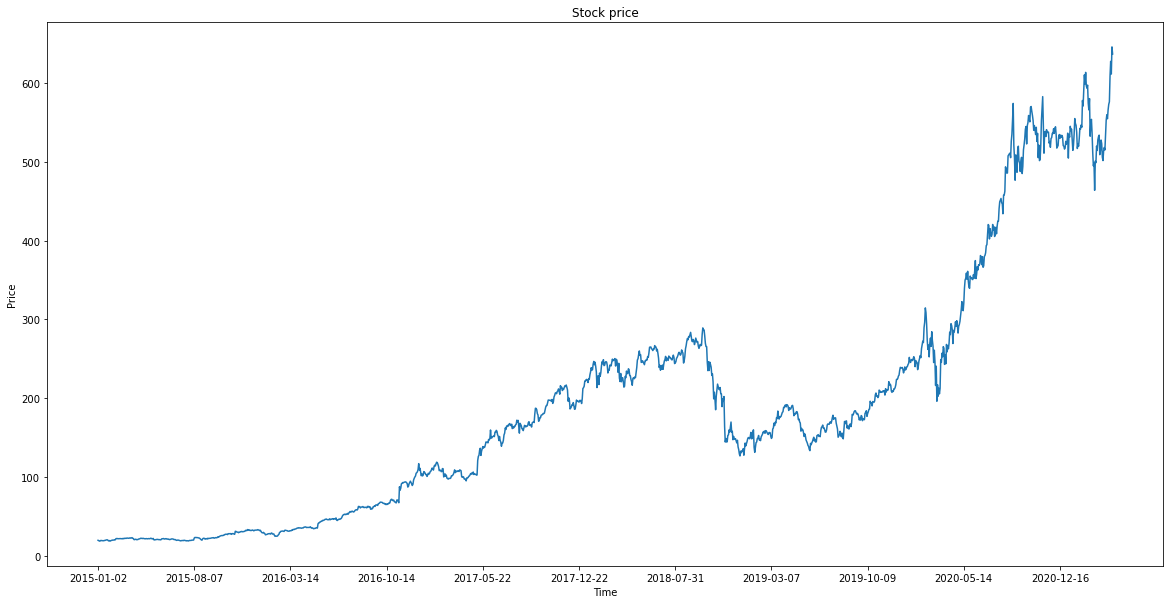

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0, 1583, 150), df['Date'][0:1583:150])
plt.title("Stock price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

### Division of the set into train and test

Selecting the **Close** price value 

In [9]:
train_data, test_data = df.iloc[0:int(len(df)*0.7), 4:5].values, df.iloc[int(len(df)*0.7):, 4:5].values

### Feature Scaling

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_data)


### Data structure with 60 time-steps and 1 output

In [11]:
#lag of 1 day (lag 1)

X_train = []
y_train = []
l=len(train_set_scaled)

for i in range(60, l):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0]);
    
X_train, y_train = np.array(X_train), np.array(y_train);
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1));


### Build the model

In [12]:
#Model building

#Sequential model API
model = Sequential()

#1 layer and Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

#2 layer and Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

#3 layer and Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

#4 layer and Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 1))

# Compile the RNN model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
33/33 [==============================] - 7s 53ms/step - loss: 0.0696
Epoch 2/100
33/33 [==============================] - 2s 52ms/step - loss: 0.0067
Epoch 3/100
33/33 [==============================] - 2s 59ms/step - loss: 0.0058
Epoch 4/100
33/33 [==============================] - 2s 58ms/step - loss: 0.0042
Epoch 5/100
33/33 [==============================] - 2s 61ms/step - loss: 0.0045
Epoch 6/100
33/33 [==============================] - 2s 57ms/step - loss: 0.0043
Epoch 7/100
33/33 [==============================] - 2s 58ms/step - loss: 0.0053
Epoch 8/100
33/33 [==============================] - 2s 61ms/step - loss: 0.0043
Epoch 9/100
33/33 [==============================] - 2s 59ms/step - loss: 0.0042
Epoch 10/100
33/33 [==============================] - 2s 60ms/step - loss: 0.0049
Epoch 11/100
33/33 [==============================] - 2s 62ms/step - loss: 0.0038
Epoch 12/100
33/33 [==============================] - 2s 61ms/step - loss: 0.0037: 0s - loss: 0.
Epoch 13/1

Epoch 100/100
33/33 [==============================] - 2s 62ms/step - loss: 0.0016


### Prepare test data

In [16]:
data_train, data_test = df.iloc[:int(len(df)*0.7), 1:2], df.iloc[int(len(df)*0.7):, 1:2]

data = pd.concat((data_train, data_test), axis = 0)
inputs = data[len(data) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0]);
    
X_test = np.array(X_test);
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1));

print(X_test.shape)


(475, 60, 1)
